<a href="https://colab.research.google.com/github/cluglucas/Modelo-Vendas/blob/main/Estudo_de_caso_vendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estudo de caso: modelo de previsão de vendas baseado no gasto de propagandas em determinado meio de comunicação

A base de dados fornece o gasto por mês em propagandas em 3 tipos de meio de comunicação e as cendas do respectivo mês.

## Importação da base

In [19]:
import pandas as pd

df=pd.read_csv('https://raw.githubusercontent.com/cluglucas/Modelo-Vendas/main/advertising.csv')
display(df)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


Observa-se que o gasto em propaganda está na casa dos milhares e as vendas na casa dos milhões pois não faria sentido caso estivessem na mesma medida.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


Não é necessária nenhuma alteração na base de dados

## Mapa de calor das correlações entre as categorias da base

Atente-se às correlações entre os gastos por meio de comunicação e vendas

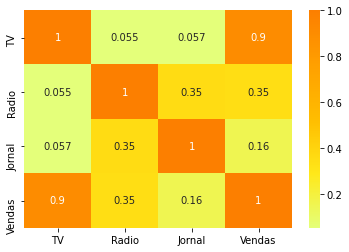

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(), cmap="Wistia", annot=True)
plt.show()

## Aplicação dos modelos

Foram escolhidos dois modelos a serem implementados: regressão linear e regressão aleatória

In [5]:
from sklearn.model_selection import train_test_split

x=df.drop('Vendas',axis=1)
y=df['Vendas']

x_treino, x_teste, y_treino, y_teste = train_test_split(x,y,test_size=0.3)


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

linear=LinearRegression()
randomforest=RandomForestRegressor()

linear.fit(x_treino, y_treino)
randomforest.fit(x_treino, y_treino)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

## R² e MSE de cada modelo

In [17]:
from sklearn import metrics

teste_linear = linear.predict(x_teste)
teste_random = randomforest.predict(x_teste)

r2_linear = metrics.r2_score(y_teste, teste_linear)
r2_random = metrics.r2_score(y_teste, teste_random)
print('R² do modelo de regressão linear é {}\nO R² do modelo de regressão aleatória é {}\n'.format(r2_linear,r2_random))

erro_linear = metrics.mean_squared_error(y_teste,teste_linear)
erro_random = metrics.mean_squared_error(y_teste,teste_random)
print('O MSE do modelo de regressão linear é {}\nO MSE do modelo de regressão aleatória é {}'.format(erro_linear,erro_random))

R² do modelo de regressão linear é 0.8243886181674603
O R² do modelo de regressão aleatória é 0.9336670804477287

O MSE do modelo de regressão linear é 4.479453663985934
O MSE do modelo de regressão aleatória é 1.6920044499999962


O Melhor modelo e o que será escolhido é o de regressão aleatória

## Tabela de Vendas reais e previsão do melhor modelo

In [8]:
df_comparacao=pd.DataFrame()
df_comparacao['Vendas Reais']=y_teste
df_comparacao['Previsão']=teste_random
df_comparacao=df_comparacao.reset_index(drop=True)
df_comparacao

,Vendas Reais,Previsão
0,8.7,9.039
1,20.7,19.466
2,18.0,18.898
3,12.6,9.517
4,11.3,10.738
5,16.6,18.249
6,16.9,17.093
7,17.5,16.802
8,20.7,21.368
9,16.0,18.456


## Gráfico que compara os valores reais com as previsões

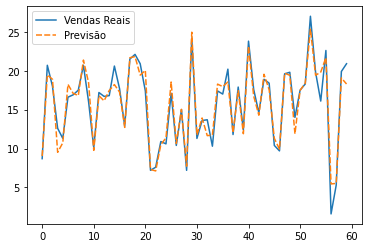

In [9]:
sns.lineplot(data=df_comparacao)
plt.show()

## Tabela que mostra o índice de importância de cada meio para o modelo

In [13]:
df_importancia=pd.DataFrame(randomforest.feature_importances_).reset_index().rename(columns={'index':'Meio de Comunicação',0:'Índice de importância para o modelo'})
df_importancia['Meio de Comunicação']=['TV','Rádio','Jornal']
df_importancia

,Meio de Comunicação,Índice de importância para o modelo
0,TV,0.851185
1,Rádio,0.137431
2,Jornal,0.011384
